# Bayesian optimization for non-vectorial data

We consider the problem of finding the optimal data $x^*$ from $N$ non-vectorial data $\{x_1,\cdots,x_N\}$ that minimize the objective function $f:\mathcal{D}\to\mathbb{R}$, while we observe as few objective function values as possible by the Bayesian optimization algorithm.

$x^*=\underset{x\in\mathcal{D}}{\operatorname{argmin}}f(x)$

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from BayesianOptimization import BayesianOptimization

## Data

We use the ESOL dataset about water solubility of relatively small molecules (http://moleculenet.ai/datasets-1).
`data_file` is the objective function values and `kernel_file` is the Gram matrix for all molecules in the dataset.
- values[i]: water solubility of the molecule $x_i$
- kernel[i][j]: kernel function value $k(x_i,x_j)$

In [8]:
data_file = "data/esol.npy"
kernel_file = "kernel/esol_kernel.npy"
values = np.load(data_file)
kernel = np.load(kernel_file)

print(values.shape)
print(kernel.shape)

(1128,)
(1128, 1128)


## Input

The first input is the objective function which takes an index of data as input and return some scalar value. We access the value through the method named by `f`. Note that we assume that we are given objective function values for all possble data in advance. The second input is the Gram matrix.

In [10]:
class ObjectiveFunction:
    def __init__(self, y):
        self.y = y
        
    def f(self, i):
        return self.y[i]
    
objective = ObjectiveFunction(values)
bo = BayesianOptimization(objective, kernel)

## Experiment

The Bayesian optimization algorithm is executed by calling the `optimize` method. We can get the best observation for each iteration through the `result` attribute.

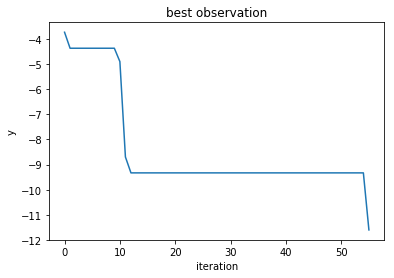

In [11]:
bo.optimize()
result = bo.result

plt.plot(list(range(len(result))), result)
plt.title("best observation")
plt.xlabel("iteration")
plt.ylabel("y")
plt.show()